<a href="https://colab.research.google.com/github/JoelAdams001/silver-spoon/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

##KMeans Clustering

In [134]:
df = pd.read_csv("Admission_Data.csv", index_col=None)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [135]:
df.info() #Okay the data looks very clean already, I just grabbed this from Kaggle

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [136]:
X = df[['GRE Score','TOEFL Score']] #Let's cluster the test scores
X.head()

,GRE Score,TOEFL Score
0,337,118
1,324,107
2,316,104
3,322,110
4,314,103


In [137]:
X.info() #Looks good still

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
GRE Score      400 non-null int64
TOEFL Score    400 non-null int64
dtypes: int64(2)
memory usage: 6.3 KB


In [138]:
kmodel = KMeans(3, init='k-means++')
kmodel.fit(X)
c = kmodel.predict(X)
kmodel.labels_

array([1, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1,
       1, 1, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 1, 2,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0,

Text(0, 0.5, 'TOEFL Score')

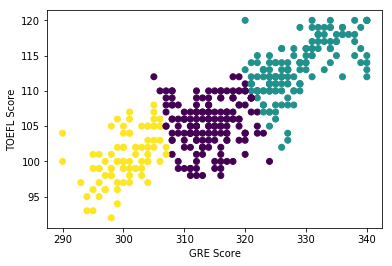

In [139]:
plt.scatter(X['GRE Score'], X['TOEFL Score'], c=kmodel.labels_, cmap='viridis')
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')

Text(0, 0.5, 'TOEFL Score')

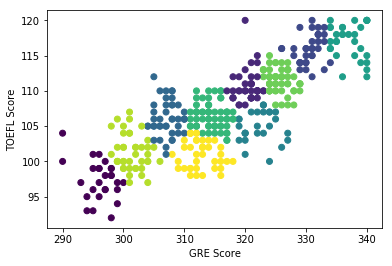

In [140]:
#Hmm, let's try 10 clusters
kmodel = KMeans(10, init='k-means++')
kmodel.fit(X)
c = kmodel.predict(X)
plt.scatter(X['GRE Score'], X['TOEFL Score'], c=kmodel.labels_, cmap='viridis')
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')

Text(0, 0.5, 'TOEFL Score')

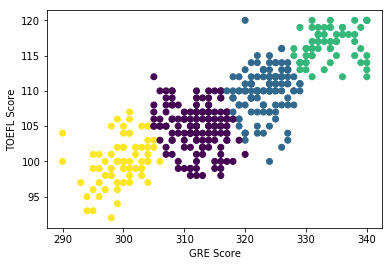

In [141]:
#That doesn't make much sense, I'm going to try 4
kmodel = KMeans(4, init='k-means++')
kmodel.fit(X)
c = kmodel.predict(X)
plt.scatter(X['GRE Score'], X['TOEFL Score'], c=kmodel.labels_, cmap='viridis')
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')

In [0]:
#That actually makes some sense, a group of poor performers, moderately poor, average and best performers.

##Random Forests

In [155]:
x = df[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]

df['Bool'] = (df['Chance of Admit ']>=0.90) #New column giving a binary output indicating if chance of admission is above 90%
y = df[['Bool']]

#Create training/test data split and forest model instance
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
random_trees = RandomForestClassifier(n_estimators = 10)
#Train my model
random_trees.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [156]:
print(y) #Lets check what it determines is admitted or not into university

      Bool
0     True
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8    False
9    False
10   False
11   False
12   False
13   False
14   False
15   False
16   False
17   False
18   False
19   False
20   False
21   False
22    True
23    True
24    True
25    True
26   False
27   False
28   False
29   False
..     ...
370  False
371  False
372   True
373  False
374  False
375  False
376  False
377  False
378  False
379  False
380  False
381  False
382  False
383  False
384   True
385   True
386  False
387  False
388  False
389  False
390  False
391  False
392  False
393  False
394  False
395  False
396  False
397   True
398  False
399   True

[400 rows x 1 columns]


In [157]:
random_trees.score(x_test,y_test) #Dang that's a pretty good score

0.975

In [158]:
from sklearn.metrics import confusion_matrix
y_pred = random_trees.predict(x_test)
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[63,  0],
       [ 2, 15]])

##Okay so it is a pretty small confusion matrix but hey. We see that 63 cases were successfully predicted as admitted and 15 successfully predicted as not admitted while 2 were incorrectly predicted as not admitted when they were.

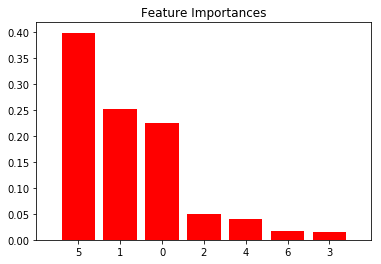

In [170]:
ranks = random_trees.feature_importances_
indices = np.argsort(ranks)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(x_train.shape[1]), ranks[indices], color='red',
        align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.ylim(0)
plt.show()

In [173]:
for n in range(x_train.shape[1] - 1):
  print(indices[n], x_train.columns[indices[n] - 1])

5 LOR 
1 GRE Score
0 Research
2 TOEFL Score
4 SOP
6 CGPA


#Alright so to wrap up this homework, we see a nice visualization of the importance of different factors on the chance of getting admitted into university. LOR is the number of letter of recomendations. This was the most important factor towards getting accepted.